# Anaysis of Follower-force Buckling Dynamics Data

In [1]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate
import pandas as pd

import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 12})

linux system
dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', '

In [2]:
# Load the file and extract data

data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first'

# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/2021-12-19'

In [3]:
# List all files in the folder
folders = next(os.walk(data_folder))[1]

for ii, folder in enumerate(folders):
    print(ii, folder)


0 SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.026_activityTime_750_simType_point
1 SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.605_activityTime_750_simType_point
2 SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.763_activityTime_750_simType_point
3 SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_3.0_activityTime_750_simType_point
4 SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.211_activityTime_750_simType_point
5 SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.632_activityTime_750_simType_point
6 SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.553_activityTime_750_simType_point
7 SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point
8 SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.141_activityTime_750_simType_point
9 SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.947_activityTime_750_simTyp

## Run analysis on each filament condition

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.026_activityTime_750_simType_point
Activity time 750
PotDipole strength 1.026315789473684
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.026_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.026_activityTime_750_simType_point
Data

Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.026_activityTime_750_simType_point
Data file SimResults_00_0.61.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.026_activityTime_750_simType_point
Data file SimResults_00_1.03.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_ex

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.026_activityTime_750_simType_point
Data file SimResults_00_1.22.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.026_activityTime_750_simType_point
Data file SimResults_00_1.41.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.605_activityTime_750_simType_point
Activity time 750
PotDipole strength 2.6052631578947367
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.605_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.605_activityTime_750_simType_point
Dat

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.605_activityTime_750_simType_point
Data file SimResults_00_1.03.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.605_activityTime_750_simType_point
Data file SimResults_00_0.83.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.605_activityTime_750_simType_point
Data file SimResults_00_1.41.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.605_activityTime_750_simType_point
Data file SimResults_00_1.15.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.763_activityTime_750_simType_point
Activity time 750
PotDipole strength 0.763157894736842
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.763_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.763_activityTime_750_simType_point
Data

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.763_activityTime_750_simType_point
Data file SimResults_00_0.13.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.763_activityTime_750_simType_point
Data file SimResults_00_0.54.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.763_activityTime_750_simType_point
Data file SimResults_00_0.48.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.763_activityTime_750_simType_point
Data file SimResults_00_1.35.hdf5
1.3463968452819834


<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_3.0_activityTime_750_simType_point
Activity time 750
PotDipole strength 3.0
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_3.0_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_3.0_activityTime_750_simType_point
Data file SimResults_00_

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_3.0_activityTime_750_simType_point
Data file SimResults_00_1.03.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_3.0_activityTime_750_simType_point
Data file SimResults_00_0.83.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of p

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_3.0_activityTime_750_simType_point
Data file SimResults_00_1.22.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_3.0_activityTime_750_simType_point
Data file SimResults_00_1.41.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of p

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.211_activityTime_750_simType_point
Activity time 750
PotDipole strength 2.210526315789473
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.211_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.211_activityTime_750_simType_point
Data

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.211_activityTime_750_simType_point
Data file SimResults_00_0.61.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.211_activityTime_750_simType_point
Data file SimResults_00_1.03.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.211_activityTime_750_simType_point
Data file SimResults_00_1.41.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.211_activityTime_750_simType_point
Data file SimResults_00_1.15.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_ex

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.632_activityTime_750_simType_point
Activity time 750
PotDipole strength 0.631578947368421
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.632_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.632_activityTime_750_simType_point
Data

No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.632_activityTime_750_simType_point
Data file SimResults_00_0.61.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.632_activityTime_750_simType_point
Data file SimResults_00_1.03.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_Buckling

Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.632_activityTime_750_simType_point
Data file SimResults_00_1.15.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.632_activityTime_750_simType_point
Data file SimResults_00_0.45.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/d

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.553_activityTime_750_simType_point
Activity time 750
PotDipole strength 1.5526315789473684
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.553_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.553_activityTime_750_simType_point
Dat

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.553_activityTime_750_simType_point
Data file SimResults_00_1.03.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.553_activityTime_750_simType_point
Data file SimResults_00_0.83.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.553_activityTime_750_simType_point
Data file SimResults_00_1.15.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.553_activityTime_750_simType_point
Data file SimResults_00_0.45.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point
Activity time 750
PotDipole strength 1.52564102564103
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point
Data 

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point
Data file SimResults_00_0.61.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point
Data file SimResults_00_1.03.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point
Data file SimResults_00_1.41.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point
Data file SimResults_00_1.15.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.141_activityTime_750_simType_point
Activity time 750
PotDipole strength 1.1410256410256399
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.141_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.141_activityTime_750_simType_point
Dat

Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.141_activityTime_750_simType_point
Data file SimResults_00_1.03.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.141_activityTime_750_simType_point
Data file SimResults_00_0.83.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/d

Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.141_activityTime_750_simType_point
Data file SimResults_00_1.41.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.141_activityTime_750_simType_point
Data file SimResults_00_1.15.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_ex

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.947_activityTime_750_simType_point
Activity time 750
PotDipole strength 1.9473684210526316
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.947_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.947_activityTime_750_simType_point
Dat

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.947_activityTime_750_simType_point
Data file SimResults_00_1.03.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.947_activityTime_750_simType_point
Data file SimResults_00_0.83.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

Data file SimResults_00_1.12.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.947_activityTime_750_simType_point
Data file SimResults_00_1.22.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.947_activityTime_750_simType_point
Data file SimResults_00_1.41.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.895_activityTime_750_simType_point
Activity time 750
PotDipole strength 0.8947368421052632
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.895_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.895_activityTime_750_simType_point
Dat

Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.895_activityTime_750_simType_point
Data file SimResults_00_1.25.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.895_activityTime_750_simType_point
Data file SimResults_00_0.61.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_ex

No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.895_activityTime_750_simType_point
Data file SimResults_00_0.22.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.895_activityTime_750_simType_point
Data file SimResults_00_1.12.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_Buckling

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.474_activityTime_750_simType_point
Activity time 750
PotDipole strength 2.473684210526316
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.474_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.474_activityTime_750_simType_point
Data

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.474_activityTime_750_simType_point
Data file SimResults_00_1.03.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.474_activityTime_750_simType_point
Data file SimResults_00_0.83.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.474_activityTime_750_simType_point
Data file SimResults_00_1.15.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.474_activityTime_750_simType_point
Data file SimResults_00_0.45.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.684_activityTime_750_simType_point
Activity time 750
PotDipole strength 1.6842105263157894
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.684_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.684_activityTime_750_simType_point
Dat

Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.684_activityTime_750_simType_point
Data file SimResults_00_0.51.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.684_activityTime_750_simType_point
Data file SimResults_00_0.99.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_b

No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.684_activityTime_750_simType_point
Data file SimResults_00_0.8.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.684_activityTime_750_simType_point
Data file SimResults_00_1.54.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingD

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.816_activityTime_750_simType_point
Activity time 750
PotDipole strength 1.8157894736842104
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.816_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.816_activityTime_750_simType_point
Dat

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.816_activityTime_750_simType_point
Data file SimResults_00_1.03.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.816_activityTime_750_simType_point
Data file SimResults_00_0.83.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.816_activityTime_750_simType_point
Data file SimResults_00_0.45.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.816_activityTime_750_simType_point
Data file SimResults_00_0.19.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.158_activityTime_750_simType_point
Activity time 750
PotDipole strength 1.1578947368421053
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.158_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.158_activityTime_750_simType_point
Dat

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.158_activityTime_750_simType_point
Data file SimResults_00_1.03.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.158_activityTime_750_simType_point
Data file SimResults_00_0.83.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

Data file SimResults_00_1.15.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.158_activityTime_750_simType_point
Data file SimResults_00_0.45.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.158_activityTime_750_simType_point
Data file SimResults_00_0.19.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.077_activityTime_750_simType_point
Activity time 750
PotDipole strength 1.07692307692308
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.077_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.077_activityTime_750_simType_point
Data 

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.077_activityTime_750_simType_point
Data file SimResults_00_1.03.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.077_activityTime_750_simType_point
Data file SimResults_00_0.83.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.077_activityTime_750_simType_point
Data file SimResults_00_1.15.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.077_activityTime_750_simType_point
Data file SimResults_00_0.45.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

<IPython.core.display.Javascript object>

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.868_activityTime_750_simType_point
Activity time 750
PotDipole strength 2.8684210526315788
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.868_activityTime_750_simType_point
Data file SimResults_00_0.32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.868_activityTime_750_simType_point
Dat

Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.868_activityTime_750_simType_point
Data file SimResults_00_1.03.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.868_activityTime_750_simType_point
Data file SimResults_00_0.83.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_ex

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.868_activityTime_750_simType_point
Data file SimResults_00_1.41.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:of particles : 32
No:of time points : 1126
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.868_activityTime_750_simType_point
Data file SimResults_00_1.15.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 0.9991119005328597
No:

<IPython.core.display.Javascript object>


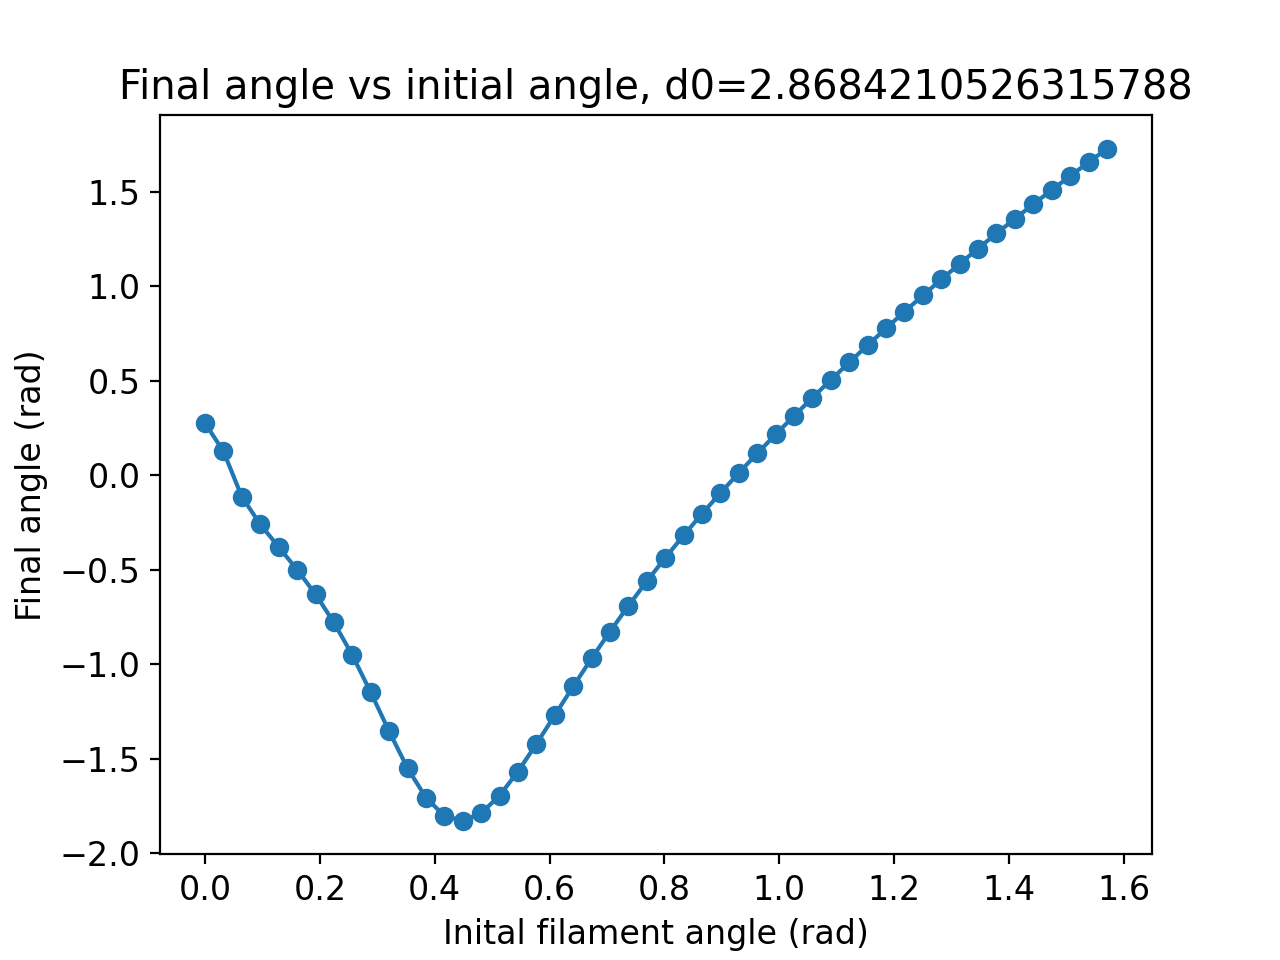

FixedPointAnalysis


FileNotFoundError: [Errno 2] No such file or directory: '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/FixedPointAnalysis/metadata.csv'

In [4]:
for folder in folders:
    print(folder)
    
    
    # Load metadata
    df_metadata = pd.read_csv(os.path.join(data_folder, folder, 'metadata.csv'))
    activity_timescale = df_metadata[' activity time scale'][0]
    k = df_metadata['spring constant'][0]
    d0 = df_metadata['potDipole strength'][0]
    print('Activity time', activity_timescale )
    print('PotDipole strength', d0)
    
    files = [file for file in os.listdir(os.path.join(data_folder, folder)) if file.endswith('hdf5')]
    # Allocate arrays to store the data
    init_angle_array = np.zeros(len(files))
    final_angle_array = np.zeros(len(files))
    
    # For each condition calculate buckling dynamics at different orientations
    for ii, file in enumerate(files):

        folder, *rest = os.path.split(os.path.join(data_folder, folder, file))
        filament = analysis.analysisTools(file = os.path.join(data_folder, folder, file))

        # Calculate the filament base-tip angle
        filament.compute_base_tip_angle()

        # Calculate the change in base-tip angle over the activity cycle
        
        initial_angle = filament.derived_data['base tip angle'][0]
        final_angle = filament.derived_data['base tip angle'][-1]
        
#         # Correctly handle the case where the filament angle changes sign 
#         # We take the smaller of the two angles (theta, 2pi - theta)
# #         if(np.sign(initial_angle)!=np.sign(final_angle)):
#             # If the sign changes 
#         if(final_angle < 0 and abs(final_angle)> np.pi/2):
#             final_angle = 2*np.pi + final_angle
#             delta_angle[ii] = final_angle - initial_angle
            
            
            
#         else:
#             delta_angle[ii] = final_angle - initial_angle
        
#         if(delta_angle[ii] > 0):
#             delta_angle[ii] = min(delta_angle[ii], 2*np.pi - delta_angle[ii])
#         else:
#             delta_angle[ii] = min(delta_angle[ii], 2*np.pi + delta_angle[ii])
        init_angle_array[ii] = initial_angle
        final_angle_array[ii] = final_angle

    
    # Sort the data based on initial angle
    idx = np.argsort(init_angle_array)

    init_angle_array = init_angle_array[idx]
    final_angle_array = final_angle_array[idx]
            
    print(initial_angle)
            


    title= 'Final angle vs initial angle, d0=' + str(d0)
    plt.figure()
    plt.scatter(init_angle_array, final_angle_array)
    plt.plot(init_angle_array, final_angle_array)
    plt.xlabel('Inital filament angle (rad)')
    plt.ylabel('Final angle (rad)')
    plt.title(title)

    # Save the data as a CSV file
    file_name = 'buckling_escape_angles_{}_{}'.format(activity_timescale, round(d0,3))+'.csv'

    df = pd.DataFrame({'Initial angle (rad)': init_angle_array, 'Final angle (rad)':final_angle_array, 'potDipole strength':np.repeat(round(d0, 3), len(init_angle_array), axis = 0), 'activity timescale':np.repeat(activity_timescale, len(init_angle_array), axis = 0)})

    df.to_csv(os.path.join(data_folder, file_name))

# Combined Analysis and Plotting across Filament conditions

In [5]:

files = os.listdir(data_folder)

print(data_folder)
print(files)
df_combined = pd.DataFrame({})
for ii, file in enumerate(files):
    
    
    if(ii%1==0): # skip every nth condition...
    
        if(file.endswith('csv')):
            df = pd.read_csv(os.path.join(data_folder, file))


            df_combined = df_combined.append(df)





/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first
['FinalvsInitialAngle (full).png', 'buckling_escape_angles_750_1.026.csv', 'buckling_escape_angles_750_2.868.csv', 'buckling_escape_angles_750_1.077.csv', 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.026_activityTime_750_simType_point', 'buckling_escape_angles_750_1.141.csv', 'buckling_escape_angles_750_1.947.csv', 'buckling_escape_angles_750_0.895.csv', 'buckling_escape_angles_750_1.684.csv', 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.605_activityTime_750_simType_point', 'buckling_escape_angles_750_2.605.csv', 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.763_activityTime_750_simType_point', 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_3.0_activityTime_750_simType_point', 'buckling_escape_angles_750_2.079.csv', 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.211_acti

In [186]:
df_combined

Unnamed: 0  Initial angle (rad)  Final angle (rad)  potDipole strength  \
0            0         1.755813e-08       9.051852e-08               1.026   
1            1         3.205709e-02      -2.268993e-02               1.026   
2            2         6.411414e-02      -6.346274e-02               1.026   
3            3         9.617122e-02      -8.417998e-02               1.026   
4            4         1.282283e-01      -9.377111e-02               1.026   
..         ...                  ...                ...                 ...   
45          45         1.442568e+00       1.059325e+00               1.421   
46          46         1.474625e+00       1.126235e+00               1.421   
47          47         1.506682e+00       1.192111e+00               1.421   
48          48         1.538739e+00       1.256967e+00               1.421   
49          49         1.570796e+00       1.320812e+00               1.421   

    activity timescale  
0                  750  
1                  750  
2                  750  
3                  750  
4                  750  
..                 ...  
45                 750  
46                 750  
47                 750  
48                 750  
49                 750  

[1200 rows x 5 columns]

In [6]:
parameter = 'potDipole strength'


<IPython.core.display.Javascript object>


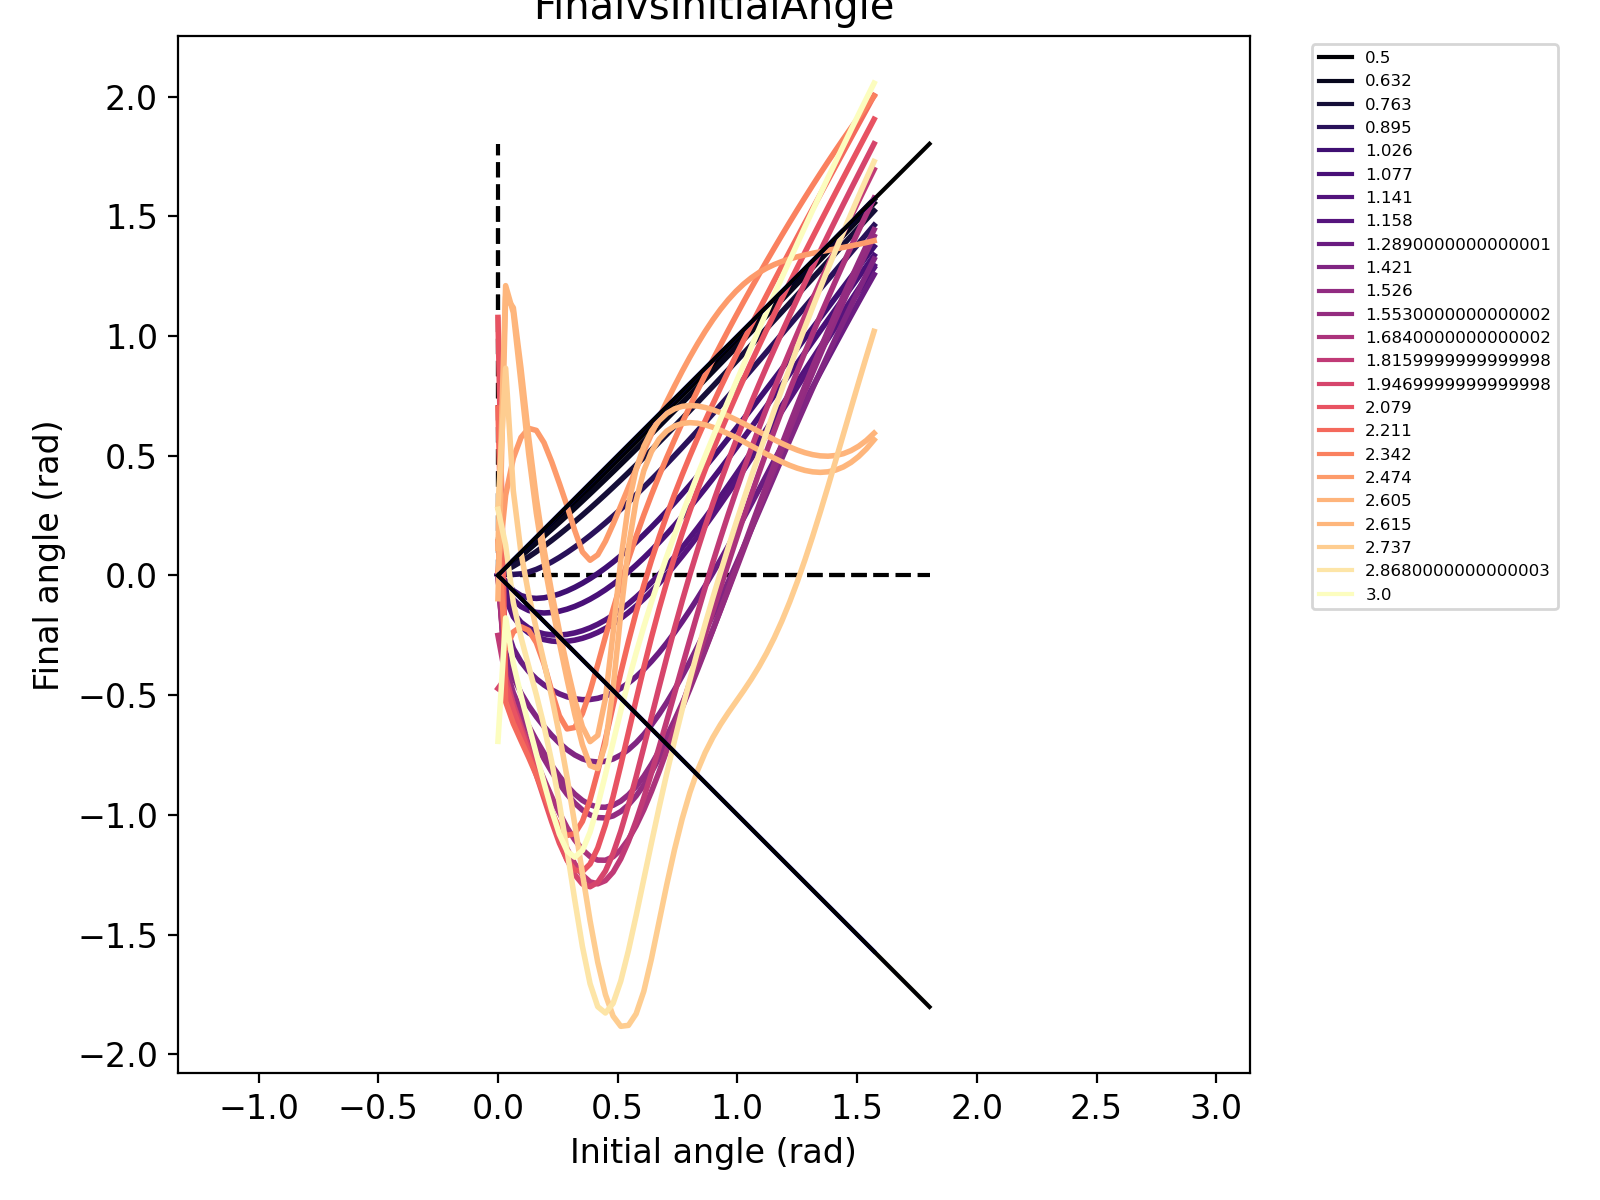

In [20]:
# Plot the orientation dynamics due to buckling for different filament stiffness
from matplotlib.colors import LogNorm
colormap = 'magma'
file_path = data_folder

title = 'FinalvsInitialAngle'
plt.figure(figsize=(8,6))
sns.lineplot(x='Initial angle (rad)', y = 'Final angle (rad)', hue = parameter,  
             data = df_combined, legend='full', palette = colormap, linewidth = 2)
# sns.scatterplot(x='Initial angle (rad)', y = 'Final angle (rad)', hue = 'd0',  
#              data = df_combined, palette = 'mako', legend = False)
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 6})
plt.tight_layout()
plt.title(title)

# Plot diagonals and guides for detecting fixed points
min_angle = np.min(df_combined['Initial angle (rad)'])
max_angle = np.max(df_combined['Initial angle (rad)'])

plt.hlines(0, min_angle, max_angle, color = 'k', linestyle = '--')
plt.vlines(0, min_angle, max_angle, color = 'k', linestyle = '--')

x_array = np.linspace(min_angle, max_angle, 10)
y_array = x_array

plt.plot(x_array, y_array, color = 'b')
plt.plot(x_array, -y_array, color = 'b')

plt.axis('equal')


# plt.savefig(os.path.join(file_path,title + '.png'), dpi = 300)
# plt.savefig(os.path.join(file_path,title + '.svg'), dpi = 300)

plt.show()


In [190]:
# Reflect the plot about X and Y to see the full return map of filament orientation

df_combined['-Initial angle (rad)'] = -df_combined['Initial angle (rad)']
df_combined['-Final angle (rad)'] = -df_combined['Final angle (rad)']

<IPython.core.display.Javascript object>


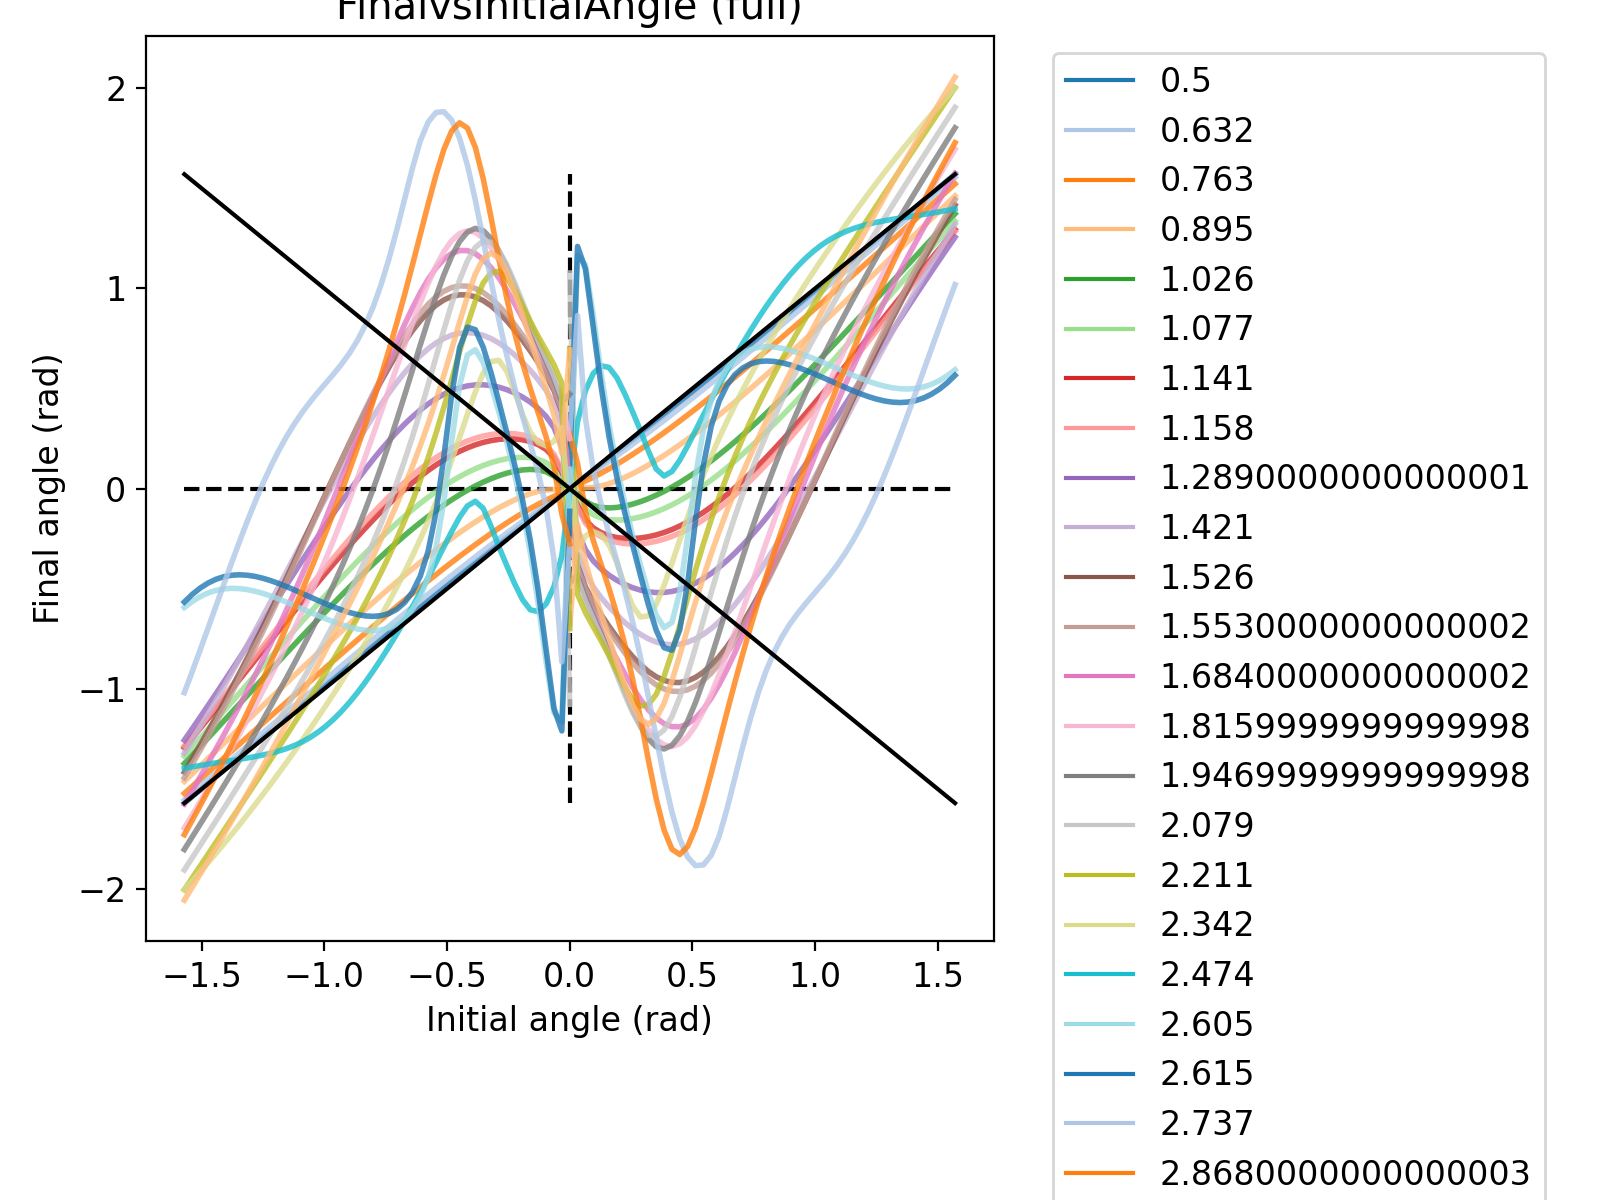

In [191]:
# Plot the overall distribution (for both +ve and -ve initial angles)

title = 'FinalvsInitialAngle (full)'
colormap = 'tab20'
alpha = 0.8

plt.figure(figsize=(8,6))
sns.lineplot(x='Initial angle (rad)', y = 'Final angle (rad)', hue = parameter,  
             data = df_combined, legend='full', palette = colormap, linewidth = 2, alpha = alpha)
sns.lineplot(x='-Initial angle (rad)', y = '-Final angle (rad)', hue = parameter,  
             data = df_combined, legend=False, palette = colormap, linewidth = 2, alpha = alpha)
# sns.scatterplot(x='Initial angle (rad)', y = 'Final angle (rad)', hue = 'd0',  
#              data = df_combined, palette = 'mako', legend = False)
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.tight_layout()
plt.title(title)



# Plot diagonals and guides for detecting fixed points
min_angle = -np.max(df_combined['Initial angle (rad)'])
max_angle = np.max(df_combined['Initial angle (rad)'])

plt.hlines(0, min_angle, max_angle, color = 'k', linestyle = '--')
plt.vlines(0, min_angle, max_angle, color = 'k', linestyle = '--')

x_array = np.linspace(min_angle, max_angle, 10)
y_array = x_array

plt.plot(x_array, y_array, color = 'k')
plt.plot(x_array, -y_array, color = 'k')

# plt.axis('equal')
plt.savefig(os.path.join(file_path,title + '.png'), dpi = 300)
plt.savefig(os.path.join(file_path,title + '.svg'), dpi = 300)

plt.show()


# Fixed-points Analysis

## Find the Fixed-points and analyze their Stability

In [15]:
def find_fixed_points(x, f):
    ''' Given an array x and f which is f(x) evaluated over the array then find all the fixed points
        f(x) = x
    '''
    N = len(x)
    
    indices = []
    for ii in range(N-1):
        if((x[ii]-f[ii]<=0 and x[ii+1] - f[ii+1]>0) or (x[ii]-f[ii]>=0 and x[ii+1]-f[ii+1]<0)):
            indices.append(ii)
           
    fixed_points = x[indices]
    
    return indices, fixed_points
    

def find_slope(x, f, x_slope):
    '''
         Given an array x and f which is f(x) evaluated over the array 
         Find the slope f'(x) evaluated at x_slope
    '''
    
    # Evaluate the slope of the function
    gradient = np.gradient(f, x)
    assert(len(gradient) == len(f))
    
    return gradient[x_slope]
    

## Trawl through the data folder and find fixed points and slope

<IPython.core.display.Javascript object>


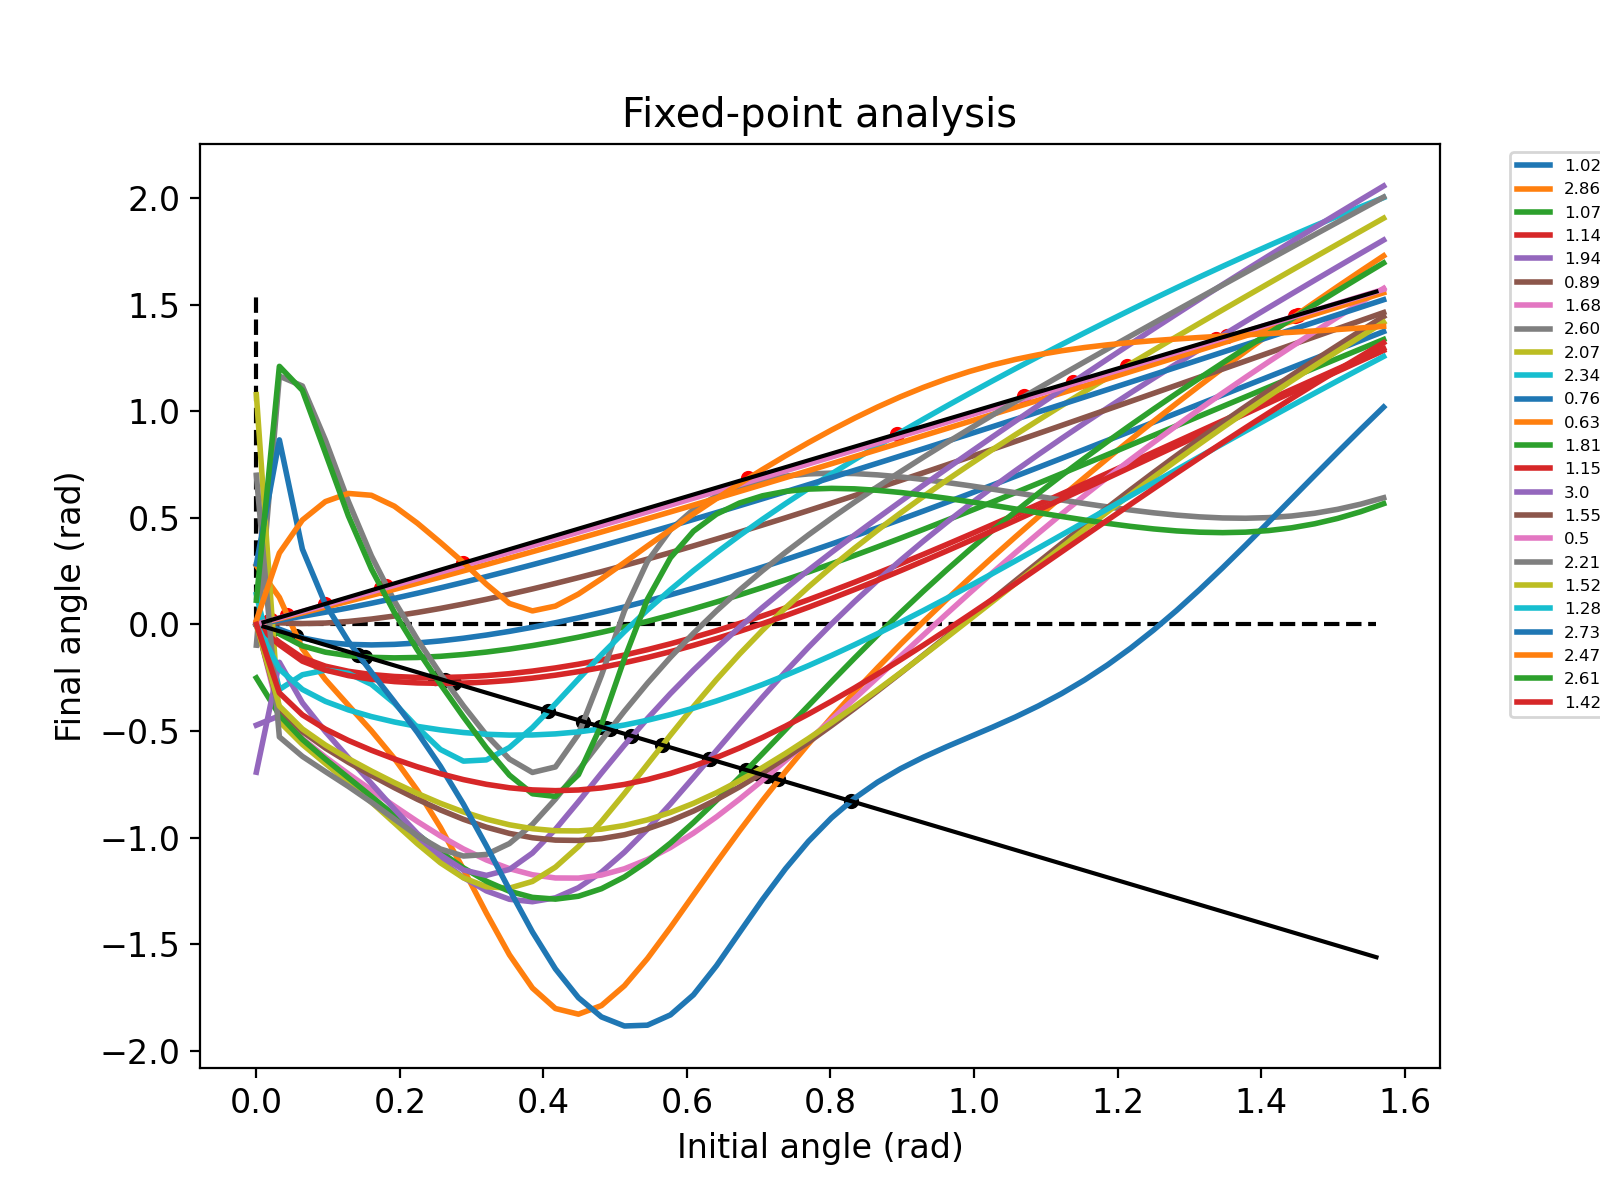

In [18]:
from scipy import interpolate


files = os.listdir(data_folder)

parameter = 'potDipole strength'


analysis_folder = os.path.join(data_folder, 'FixedPointAnalysis')

if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)



# files = ['/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/buckling_escape_angles_750_1.5526315789473684.csv']


plt.figure(figsize = (8,6))
title = 'Fixed-point analysis'

for ii, file in enumerate(files):
    
    if(file.endswith('csv')):
        
        df = pd.read_csv(os.path.join(data_folder, file))
        
        parameter_value = df[parameter][0]
        
        
        initial_angle_array = np.array(df['Initial angle (rad)'])
        final_angle_array = np.array(df['Final angle (rad)'])
        
        
        min_angle, max_angle = np.min(initial_angle_array), np.max(initial_angle_array)
        
        
        
        initial_angle_array_fine = np.linspace(min_angle+0.01, max_angle-0.01, 1000)
        
        min_angle, max_angle = np.min(initial_angle_array_fine), np.max(initial_angle_array_fine)
        
      
        
        final_angle_func = interpolate.interp1d(init_angle_array, final_angle_array, kind = 'linear')
        
        final_angle_array_fine = final_angle_func(initial_angle_array_fine)
        
    
        
        fixed_points_pos_index, fixed_points_pos = find_fixed_points(initial_angle_array_fine, final_angle_array_fine)
        fixed_points_neg_index, fixed_points_neg = find_fixed_points(-initial_angle_array_fine, final_angle_array_fine)
        
     
        
        # Find the slope at the fixed-point
        gradient_pos_fixed_points = find_slope(initial_angle_array_fine, final_angle_array_fine, fixed_points_pos_index)
        gradient_neg_fixed_points = find_slope(initial_angle_array_fine, final_angle_array_fine, fixed_points_neg_index)
        
        gradient_zero_fixed_points = find_slope(initial_angle_array_fine, final_angle_array_fine, 0)

       
        
        # Plot the Return maps along with the fixed points
        sns.lineplot(x='Initial angle (rad)', y = 'Final angle (rad)',  
             data = df, legend='full', palette = colormap, linewidth = 2, label = parameter_value)
        plt.scatter(initial_angle_array_fine[fixed_points_neg_index], fixed_points_neg, 20, color = 'k')
        plt.scatter(initial_angle_array_fine[fixed_points_pos_index], fixed_points_pos, 20, color = 'r')
        
        
        # For each condition store the fixed points, their type and the slope
        df_fixed_pts_analysis = pd.DataFrame({})

        for ii, fixed_pt in enumerate(fixed_points_pos):
            
            df_fixed_pts_analysis = df_fixed_pts_analysis.append(pd.DataFrame({'Fixed point':[fixed_pt], 'Slope':[gradient_pos_fixed_points[ii]], 'type':['Positive'], parameter:[parameter_value]}))
        
        for ii, fixed_pt in enumerate(fixed_points_neg):
            
            df_fixed_pts_analysis = df_fixed_pts_analysis.append(pd.DataFrame({'Fixed point':[fixed_pt], 'Slope':[gradient_neg_fixed_points[ii]], 'type':['Negative'], parameter:[parameter_value]}))

        
     
        # Zero is always a fixed point
        df_fixed_pts_analysis = df_fixed_pts_analysis.append(pd.DataFrame({'Fixed point':[0], 'Slope':[gradient_zero_fixed_points], 'type':['Trivial'], parameter:[parameter_value]}))

            
        
        df_fixed_pts_analysis.to_csv(os.path.join(analysis_folder, 'FixedPoints_{}_{}.csv'.format(parameter, parameter_value)))
        
plt.hlines(0, min_angle, max_angle, color = 'k', linestyle = '--')
plt.vlines(0, min_angle, max_angle, color = 'k', linestyle = '--')

x_array = np.linspace(min_angle, max_angle, 10)
y_array = x_array

plt.plot(x_array, y_array, color = 'k')
plt.plot(x_array, -y_array, color = 'k')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 6})
# plt.tight_layout()
plt.title(title)
plt.show()

    
        

In [232]:
# For each condition load the fixed points and their slope and analyze the Dynamical behavior of the system.

# Load a test file
fixed_pt_file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/FixedPointAnalysis/FixedPoints_potDipole strength_0.5.csv'

df_fixed_pt = pd.read_csv(fixed_pt_file)


def dynamical_behavior_predictor(fixed_pt, slope, pt_type):
    '''
    Given the fixed_pt, slope and 
    type of fixed pt 
    f(x) = x: Positive or f(x) = -x: Negative
    
    Returns: behavior Type, Stability
    Type of dynamical behavior expected.
    Types:
    - Trivial fixed point
    - 1-Period cycle
    - 2-Period cycle
    
    Stability:
    - Stable
    - Unstable
    
    '''
    dynamical_behavior = None
    stability = None
    
    if fixed_pt==0:
        dynamical_behavior = 'Zero fixed point'
    
    if fixed_pt!=0:
        
        if pt_type == 'Positive':
            
            dynamical_behavior = '1-Period'
        
        elif pt_type == 'Negative':
            dynamical_behavior = '2-Period'
        
    if abs(slope) > 1:
        stability = 'unstable'
    elif abs(slope) < 1:
        stability = 'linearly stable'
    elif abs(slope)==1:
        stability = 'marginal'
            
    return dynamical_behavior, stability
            
    
df_fixed_pt


Unnamed: 0  Fixed point     Slope     type  potDipole strength
0           0            0  0.947328  Trivial                 0.5

## Calculate and plot the dynamical behaviors for all the data
Save the predicted dynamical behavior and stability in the same file

In [234]:


analysis_folder = os.path.join(data_folder, 'FixedPointAnalysis')

files = os.listdir(analysis_folder)

for ii, file in enumerate(files):
    
    df = pd.read_csv(os.path.join(analysis_folder, file))
    
#     df['dynamics'] = []
#     df['stability'] = []

    dynamics_list = []
    stability_list = []
    for jj in range(len(df)):
        
        fixed_pt, slope,  pt_type = df['Fixed point'][jj], df['Slope'][jj], df['type'][jj] 
        
        dynamical_behavior, stability = dynamical_behavior_predictor(fixed_pt, slope, pt_type)
        
        dynamics_list.append(dynamical_behavior)
        stability_list.append(stability)
        
    df['dynamics'] = dynamics_list
    df['stability'] = stability_list
        
    # Save the DataFrame back to disk
    df.to_csv(os.path.join(analysis_folder, file), index = False)



## For each unique parameter value analyze the fixed-points and tabulate the stable, unstable and predicted dynamics 
The predicted dynamics is the stable dynamics if found, if not we predict the dynamics to be 'Aperiodic'

In [247]:

analysis_folder = os.path.join(data_folder, 'FixedPointAnalysis')

files = os.listdir(analysis_folder)

df_combined = pd.DataFrame({})

for ii, file in enumerate(files):
    
    df = pd.read_csv(os.path.join(analysis_folder, file))
    
    df_combined = df_combined.append(df)
    
    

# Parameter value of interest.
parameter = 'potDipole strength'

unique_parameter_values = np.unique(df_combined[parameter][:])

df_predicted_behavior = pd.DataFrame({})

for parameter_value in unique_parameter_values:
    
    stable_dynamics = []
    unstable_dynamics = []
    predicted_dynamics = []
    
    df = df_combined.loc[df_combined[parameter]==parameter_value]
    
    print(df)
    
    if np.all(df['stability']=='unstable'):
        predicted_dynamics = 'Aperiodic'
    
    for ii in range(len(df)):

        if(df['stability'][ii]=='linearly stable'):
            stable_dynamics = df['dynamics'][ii]
            predicted_dynamics = stable_dynamics

        elif(df['stability'][ii] == 'unstable' and df['type'][ii]!='Trivial'):
            unstable_dynamics.append(df['dynamics'][ii])
            
    
    df_predicted_behavior = df_predicted_behavior.append(pd.DataFrame({parameter: [parameter_value], 
       'Stable dynamics':[stable_dynamics], 'Unstable dynamics':[unstable_dynamics], 'Predicted dynamics':[predicted_dynamics]}))
                
                
    
        
            
    
    
    
    
    
    

   Unnamed: 0  Fixed point     Slope     type  potDipole strength  \
0           0          0.0  0.947328  Trivial                 0.5   

           dynamics        stability  
0  Zero fixed point  linearly stable  
   Unnamed: 0  Fixed point     Slope     type  potDipole strength  \
0           0          0.0  0.841786  Trivial               0.632   

           dynamics        stability  
0  Zero fixed point  linearly stable  
   Unnamed: 0  Fixed point     Slope     type  potDipole strength  \
0           0          0.0  0.624016  Trivial               0.763   

           dynamics        stability  
0  Zero fixed point  linearly stable  
   Unnamed: 0  Fixed point     Slope     type  potDipole strength  \
0           0          0.0  0.225969  Trivial               0.895   

           dynamics        stability  
0  Zero fixed point  linearly stable  
   Unnamed: 0  Fixed point     Slope     type  potDipole strength  \
0           0          0.0 -0.707802  Trivial               1.0

In [246]:
df_predicted_behavior

potDipole strength   Stable dynamics  \
0               0.500  Zero fixed point   
0               0.632  Zero fixed point   
0               0.763  Zero fixed point   
0               0.895  Zero fixed point   
0               1.026  Zero fixed point   
0               1.077          2-Period   
0               1.141          2-Period   
0               1.158          2-Period   
0               1.289          2-Period   
0               1.421                []   
0               1.526                []   
0               1.553                []   
0               1.684                []   
0               1.816                []   
0               1.947                []   
0               2.079                []   
0               2.211                []   
0               2.342                []   
0               2.474          1-Period   
0               2.605                []   
0               2.615                []   
0               2.737                []   
0               2.868                []   
0               3.000                []   

                          Unstable dynamics Predicted dynamics  
0                                        []   Zero fixed point  
0                                        []   Zero fixed point  
0                                        []   Zero fixed point  
0                                        []   Zero fixed point  
0                                        []   Zero fixed point  
0                                        []           2-Period  
0                                        []           2-Period  
0                                        []           2-Period  
0                                        []           2-Period  
0                                [2-Period]          Aperiodic  
0                                [2-Period]          Aperiodic  
0                                [2-Period]          Aperiodic  
0                                [2-Period]          Aperiodic  
0                      [1-Period, 2-Period]          Aperiodic  
0                      [1-Period, 2-Period]          Aperiodic  
0  [1-Period, 1-Period, 2-Period, 2-Period]          Aperiodic  
0  [1-Period, 1-Period, 2-Period, 2-Period]          Aperiodic  
0            [1-Period, 2-Period, 2-Period]          Aperiodic  
0                      [1-Period, 1-Period]           1-Period  
0            [1-Period, 2-Period, 2-Period]          Aperiodic  
0            [1-Period, 2-Period, 2-Period]          Aperiodic  
0            [1-Period, 2-Period, 2-Period]          Aperiodic  
0  [1-Period, 1-Period, 2-Period, 2-Period]          Aperiodic  
0                      [1-Period, 2-Period]          Aperiodic

In [255]:
### Save the predicted_dynamics to file
predicted_dynamics_folder = os.path.join(data_folder, 'PredictedDynamics')

if not os.path.exists(predicted_dynamics_folder):
    os.makedirs(predicted_dynamics_folder)
df_predicted_behavior.to_csv(os.path.join(predicted_dynamics_folder, 'PredictedDynamics.csv'), index = False)

## Plot the predicted dynamics vs the parameter

<IPython.core.display.Javascript object>


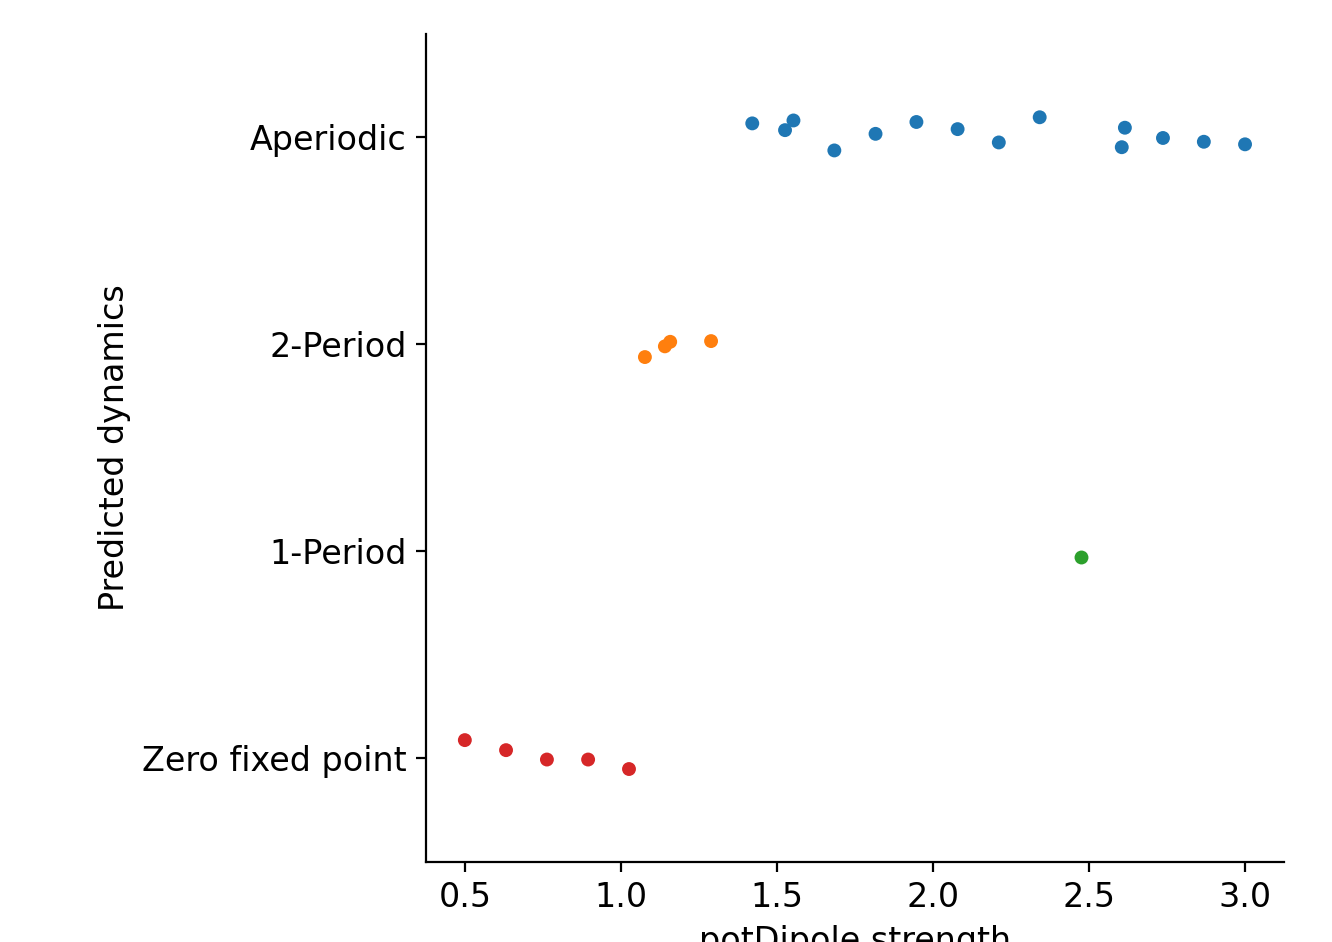

In [252]:
plt.close('all')

sns.catplot(data = df_predicted_behavior, x = parameter, y = 'Predicted dynamics', order=["Aperiodic", "2-Period", "1-Period", "Zero fixed point"])

plt.show()



<IPython.core.display.Javascript object>


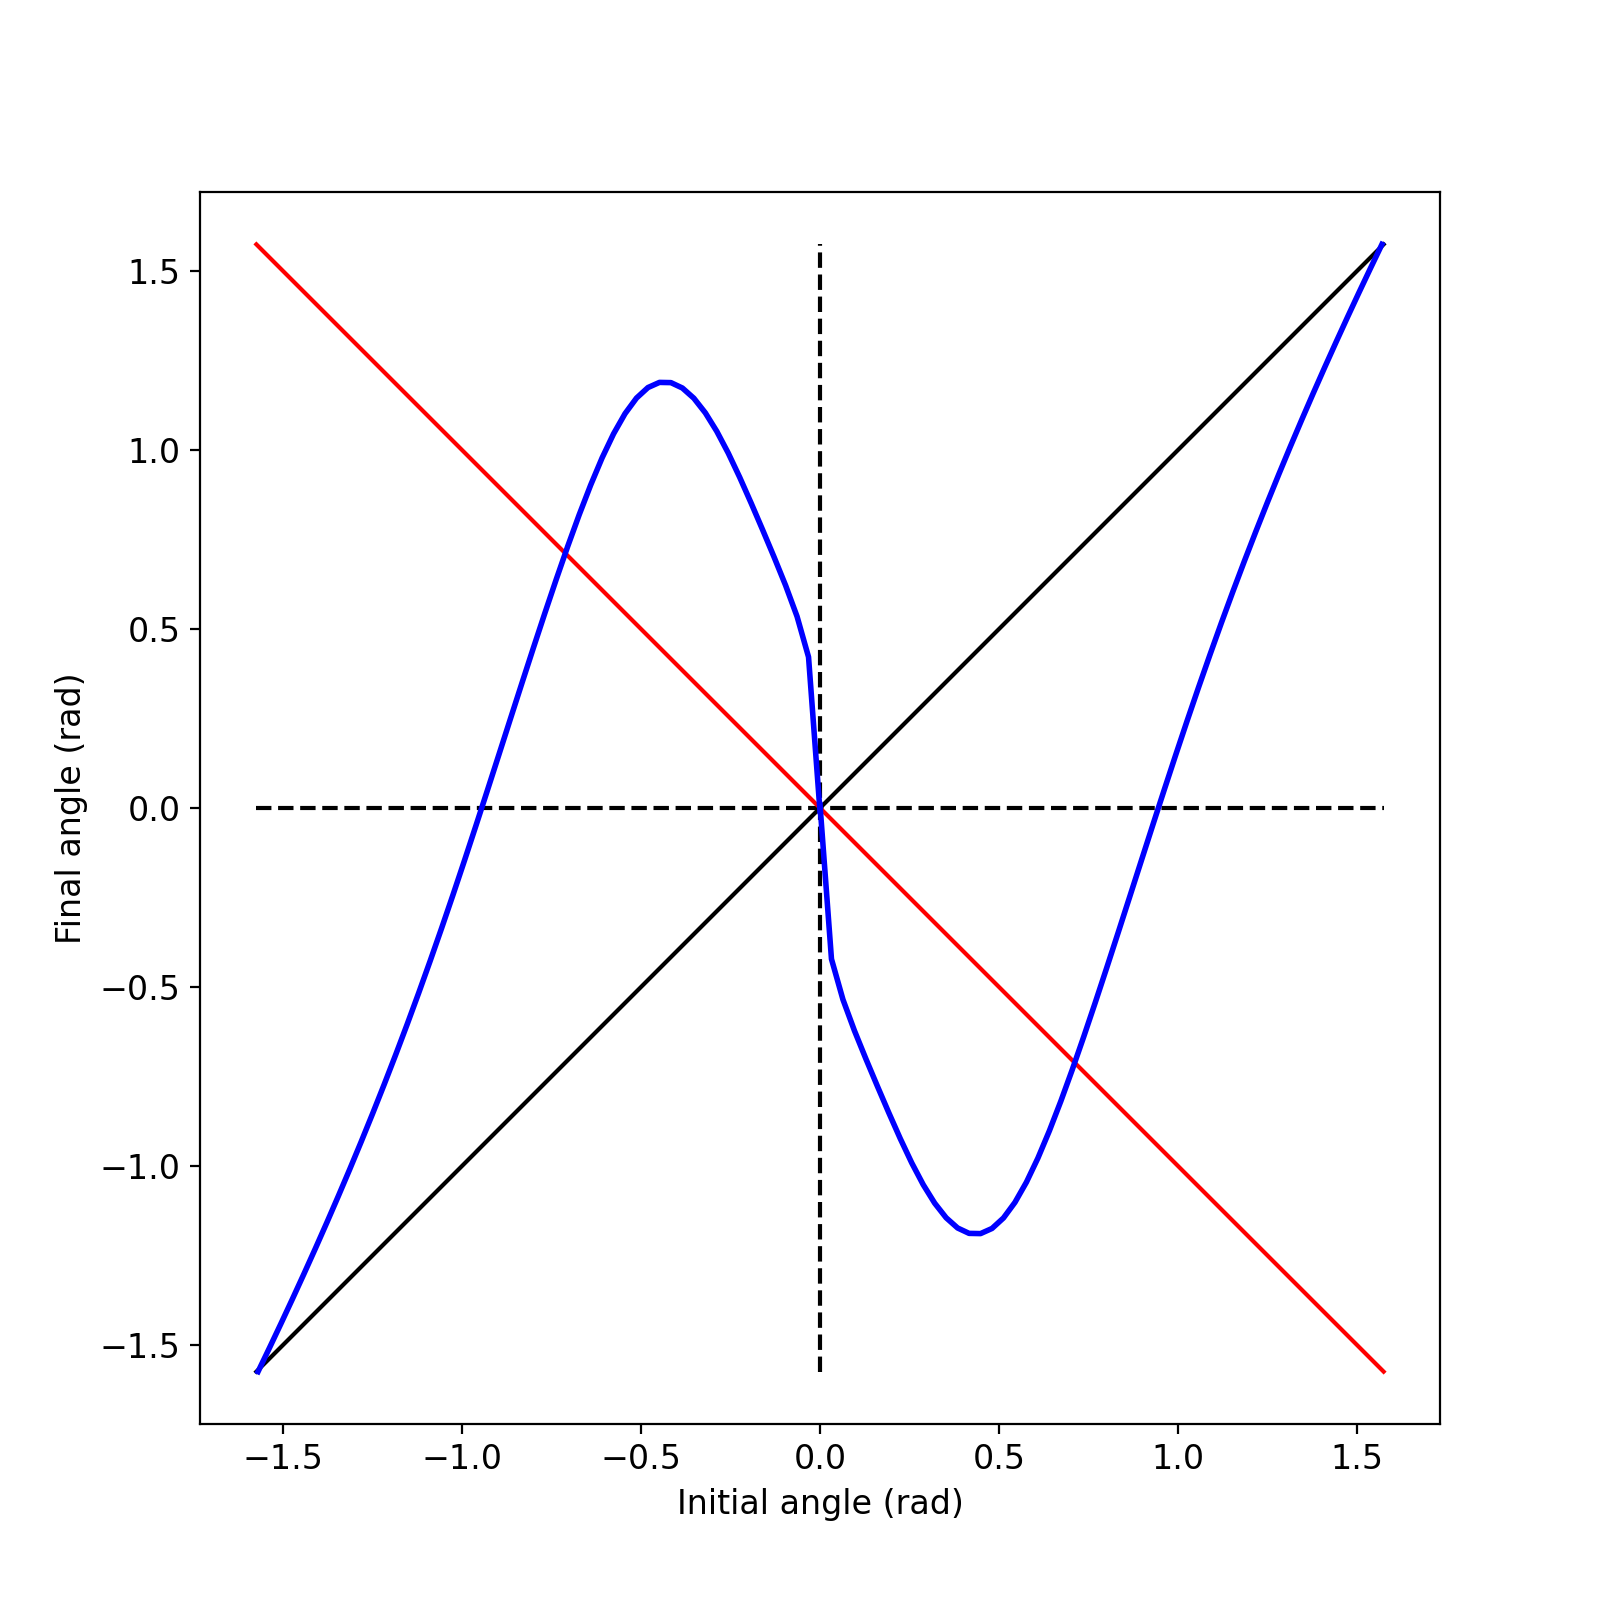

In [32]:
# Plot the Return-Map for a single value of the parameter

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/buckling_escape_angles_750_1.947.csv'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/buckling_escape_angles_750_2.079.csv'
file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_k_25_extension_first/buckling_escape_angles_750_1.684.csv'

df = pd.read_csv(file)

df['-Initial angle (rad)'] = -df['Initial angle (rad)']
df['-Final angle (rad)'] = -df['Final angle (rad)']

min_angle, max_angle = -np.max(df['Final angle (rad)']), np.max(df['Final angle (rad)'])
plt.figure(figsize = (8,8))

plt.hlines(0, min_angle, max_angle, color = 'k', linestyle = '--')
plt.vlines(0, min_angle, max_angle, color = 'k', linestyle = '--')

x_array = np.linspace(min_angle, max_angle, 10)
y_array = x_array

plt.plot(x_array, y_array, color = 'k')
plt.plot(x_array, -y_array, color = 'r')


sns.lineplot(x='Initial angle (rad)', y = 'Final angle (rad)',  
             data = df, legend='full', color = 'b', linewidth = 2)
sns.lineplot(x='-Initial angle (rad)', y = '-Final angle (rad)',  
             data = df, legend='full', color = 'b', linewidth = 2)

plt.axis('equal')
plt.savefig('ReturnMap_aperiodic.png', dpi = 300)

# Alternate representations of the orientation velocity vs orientation

-84.86819670142373
74.84952729398748


<IPython.core.display.Javascript object>


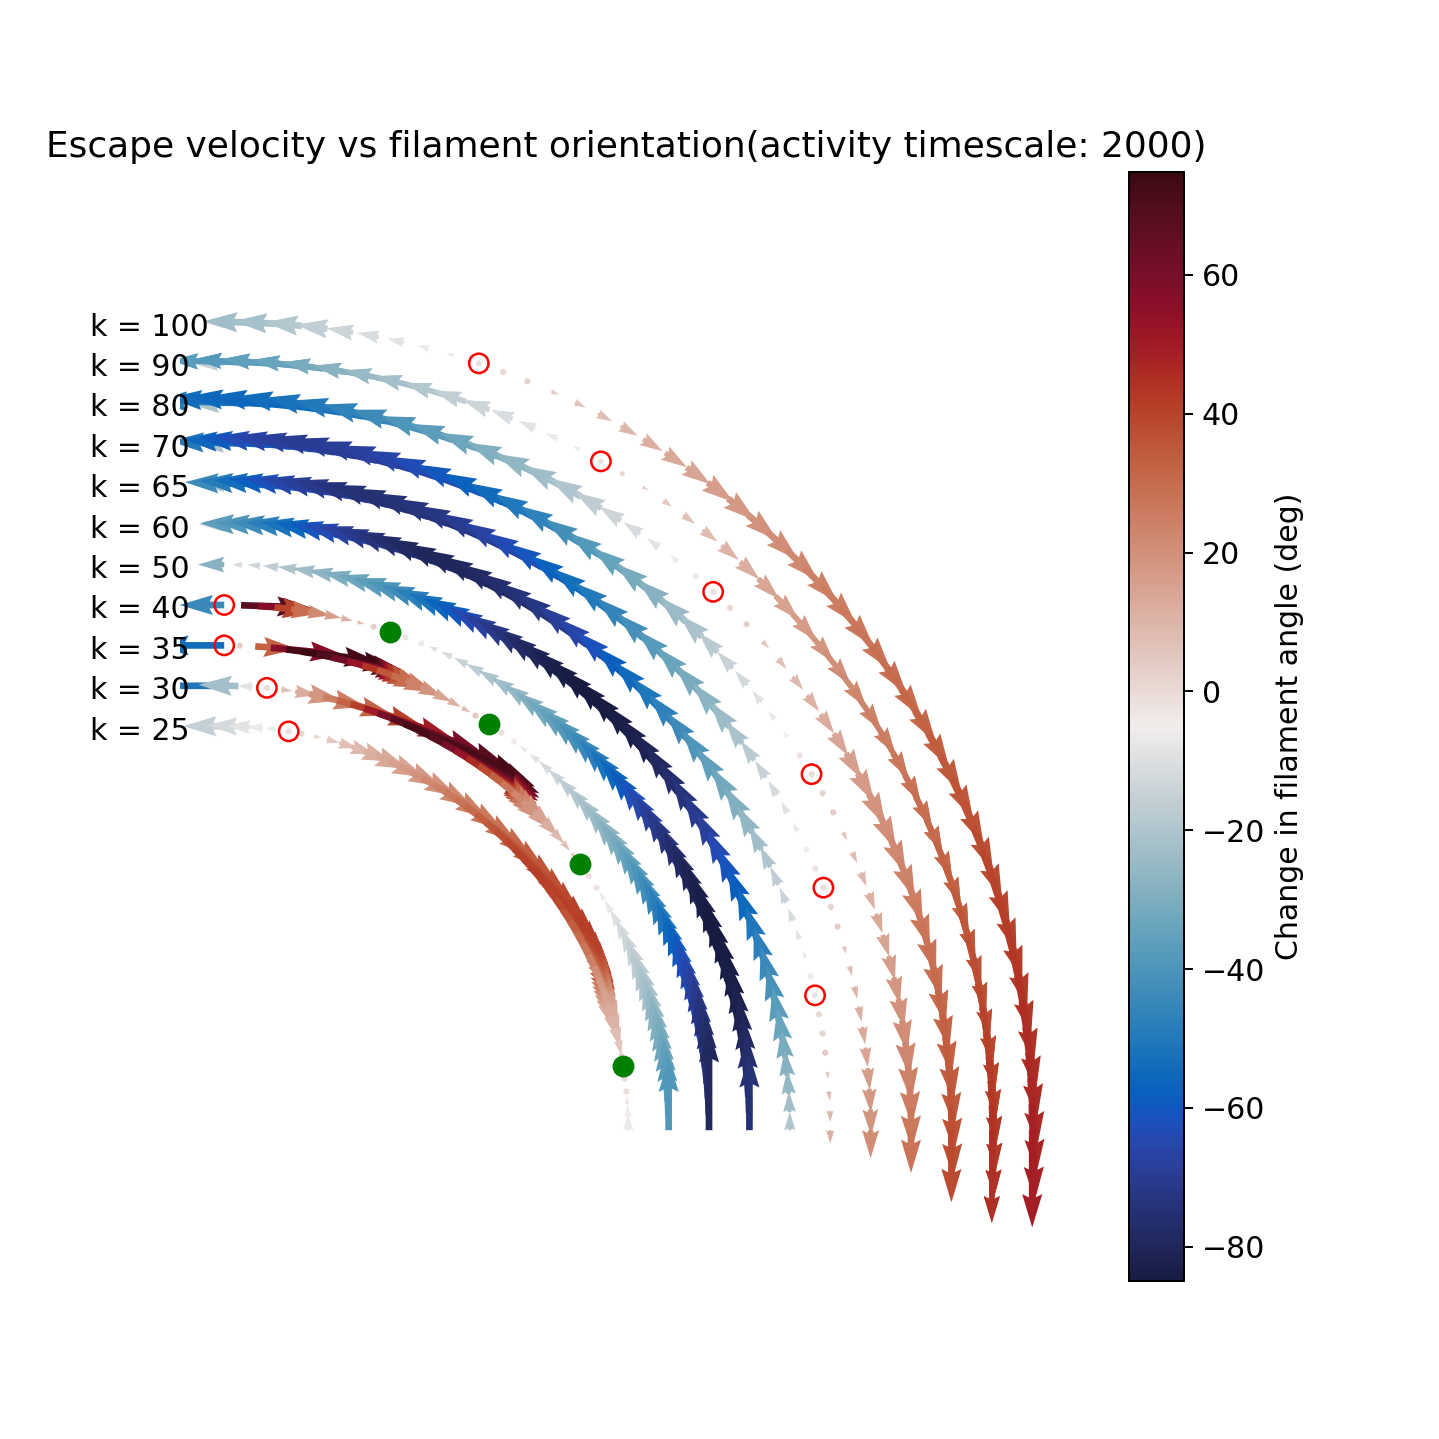

[ 1. -1.]
[ 1. -1.]
[ 1. -1.]
[ 1. -1.]
[]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


In [268]:
import cmocean
import matplotlib as mpl
file_path = analysis_data_folder

# Plotting it as a polar quiver plot
# Assign a distinct radius for each filament stiffness

delta_min = np.min(df_combined['Delta angle (deg)'])
delta_max = np.max(df_combined['Delta angle (deg)'])

print(delta_min)
print(delta_max)

norm = mpl.colors.Normalize(vmin= delta_min, vmax=delta_max)

cm = cmocean.cm.balance

sm = mpl.cm.ScalarMappable(cmap=cm, norm=norm)

plt.figure(figsize=(8,8))
for jj, k in enumerate(spring_constants_to_plot):
    
    df = df_combined[df_combined['spring constant'] == k]
    
    R = 30 + 3*jj
    vx = df['Delta angle (deg)']*np.cos(np.pi/180*df['Initial angle (deg)'])
    vy = -df['Delta angle (deg)']*np.sin(np.pi/180*df['Initial angle (deg)'])
    
    x = R*np.sin(np.pi/180*df['Initial angle (deg)'])
    y = R*np.cos(np.pi/180*df['Initial angle (deg)'])
    
    # Detect fixed-points of Delta angle
    fixed_points = np.where(np.diff(np.sign(df['Delta angle (deg)'])))[0]
    
    # Detect if fixed points are "Stable" or "Unstable"
    stability = np.sign(np.diff(df['Delta angle (deg)'])[fixed_points])
    print(stability)
    
    
    color_data = np.array(df['Delta angle (deg)'])
    
    plt.quiver(x, y, vx, vy, color = cm(norm(color_data)))
    plt.text(x[0]-10, y[0]-1, 'k = '+str(k))
    for ii, fixed_point in enumerate(fixed_points):
        if(stability[ii] > 0):
            # Unstable fixed point
            plt.scatter(x[fixed_point], y[fixed_point], 60, facecolors='none', edgecolors='r')
        elif(stability[ii] < 0):
            # Stable fixed point
            plt.scatter(x[fixed_point], y[fixed_point], 60, color = 'g')
   
cbar = plt.colorbar(sm)
plt.axis('equal')
plt.axis('off')
plt.xlabel('X')
plt.xlabel('Y')
cbar.ax.set_ylabel('Change in filament angle (deg)')
plt.title('Escape velocity vs filament orientation' + '(activity timescale: {})'.format(df['activity time'][0]))
plt.savefig(os.path.join(file_path, 'Escape velocity vs filament orientation_activity_time_{}.png'.format(df['activity time'][0])), dpi = 300)
plt.savefig(os.path.join(file_path, 'Escape velocity vs filament orientation_activity_time_{}.svg'.format(df['activity time'][0])), dpi = 300)

plt.show()
    

In [206]:
A = np.random.rand(10)
B = np.zeros(len(A))
B = np.any(A<0.5)

In [207]:
print(B)

True


In [209]:
1!=1

False